In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import math
import numpy as np
from sympy import *
from scipy.optimize import curve_fit
from propagazione import *
def model(x, a, b):
    return a + b*x
x,y,z,w,u = symbols('x y z w u')
df = pd.read_csv('Dati 5a esp.csv')
df.insert(6,"cosalfa",np.cos(df['alfa rad'])**2,true)
f=cos(x)**2
errcosalfa=np.empty(cosalfa.size)
for i in range(cosalfa.size):
    x_val=df["alfa rad"][i]
    y_val= 0
    z_val= 0
    w_val=0
    u_val=0
    sigmay= 0
    sigmaz= 0
    sigmaw=0
    sigmau= 0
    sigmax=df["err alfa rad"][i]
    sigma1=np.array([sigmax,sigmay,sigmaz,sigmaw,sigmau])
    errcosalfa[i]=(propmax(f,x_val,y_val,z_val,w_val,u_val,sigma1))
    i+=1
df.insert(7,"errcosalfa",errcosalfa,true)
df

,Pos ang,err pos ang,alfa,err alfa,alfa rad,err alfa rad,cosalfa,errcosalfa,I,err I
0,141,1,0,2,0.000000,0.034907,1.000000e+00,0.000000e+00,109.9,1.3
1,151,1,10,2,0.174533,0.034907,9.698463e-01,1.193890e-02,106.3,1.3
2,161,1,20,2,0.349066,0.034907,8.830222e-01,2.243752e-02,97.0,1.2
3,171,1,30,2,0.523599,0.034907,7.500000e-01,3.022999e-02,82.5,1.0
4,181,1,40,2,0.698132,0.034907,5.868241e-01,3.437628e-02,64.8,0.8
5,191,1,50,2,0.872665,0.034907,4.131759e-01,3.437628e-02,45.9,0.7
6,201,1,60,2,1.047198,0.034907,2.500000e-01,3.022999e-02,28.4,0.5
7,211,1,70,2,1.221730,0.034907,1.169778e-01,2.243752e-02,13.4,0.3
8,221,1,80,2,1.396263,0.034907,3.015369e-02,1.193876e-02,4.1,0.2
9,231,1,90,2,1.570796,0.034907,1.219044e-29,2.437514e-16,0.0,0.2


In [102]:
colors = ['b', 'c', 'y', 'm', 'r']
a_fit,cov=curve_fit(model,df.cosalfa,df.I,absolute_sigma=False)

La pendenza = 109.2 ± 0.3
L'intercetta = 0.6 ± 0.2


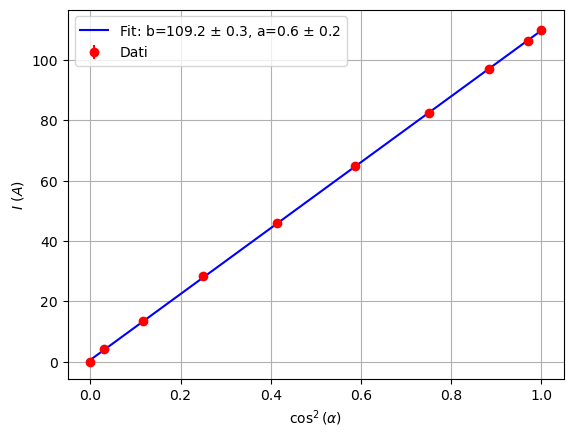

In [101]:
inter = a_fit[0]
slope = a_fit[1]
d_inter=np.sqrt(cov[0][0])
d_slope=np.sqrt(cov[1][1])
a_slope=3*d_slope
yfit = inter + slope*(df.cosalfa)
plt.errorbar(df.cosalfa,df.I,yerr=df["err I"],fmt='o',label='Dati',color='red')
plt.plot(df.cosalfa,yfit,color='blue',label=r'Fit: b={:.1f} $\pm$ {:.1f}, a={:.1f} $\pm$ {:.1f}'.format(slope,d_slope,inter,d_inter))
plt.ylabel(r'$I \ (A)$ ')
plt.xlabel(r'$\cos^2(\alpha) $')
plt.grid()
print('La pendenza = {:.1f} ± {:.1f}'.format(slope,d_slope))
print('L\'intercetta = {:.1f} ± {:.1f}'.format(inter,d_inter))
plt.legend(loc='best')
plt.show()